
**OVERVIEW**

Step by step approach from question one to four.

My basic principle on undertaking a data science problem like this challenge is following the process through 3 processes: Extraction, Exploration and Experience.

Extraction: is where I get relevant data to be analysed
Exploration: is where I explore the data this is where issues on cleaning data and removing null values come up.
Experience: is where you show insights on the findings

**T00LS USED:**

Considering the problem at hand I used the following tools:

**Python** was the main and only language used. This was due to it's powerful set of libraries that quickly help in analysing and getting relevant insights from data. 
**Jupyter notebooks:** I used jupyter notebooks since I am familiar with it with its wide range of uses in data cleaning and transformation, statistical modeling and data visualization, machine learning, and much more.

**IMPLEMENTATION**


In [2]:
import pandas as pd # deals with dataframes and their processing
import numpy as np # deals with datastructures
import pandas_profiling as pp #provides an overview of the dataset in hand
import re # deals with regex operations

#enables plotting to be displayed
%matplotlib inline    

Reading of the provided data set

In [7]:
travelsdf = pd.read_csv("train_revised.csv")
travelsdf.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


The next steps I used the pandas profiling library which shows a summary of the dataset at hand.THe output of this will be displayed below.
The results were the dataset is clean ie. free from null or empty values that need to be filled. SInce no cleaning was necessary I gladly proceeded on answering the questions.

In [8]:
# this shows a brief summary overview of the dataset in hand
pp.ProfileReport(travelsdf)

Number of variables,10
Number of observations,51645
Total Missing (%),0.0%
Total size in memory,3.9 MiB
Average record size in memory,80.0 B
Numeric,1
Categorical,6
Boolean,1
Date,0
Text (Unique),1
Rejected,1


**QUESTION 1: Find on average the top seven (7) most travelled routes for a Sunday. Indicate the average of each and rank them in decreasing order.**

Columns affected: travel_date, travel_from, travel_to


Will start by merging the travel_date with travel_time column then converting the merged column to a datetime object. A new column containing days of the week extracted from the datetime object will then be created. The data frame will then be filtered to only Sunday records. Finally grouping of the the average of the top seven most travelled to destinations will be extracted. 

**Results is shown on the table below the code**

In [18]:
#merge the two columns to form a datetime column 

travelsdf["travel_datetime"] = travelsdf["travel_date"]+ " " +travelsdf["travel_time"]
travelsdf.travel_datetime.head(5)

#converting the travel_datetime field to datetime format
travelsdf['travel_datetime'] = pd.to_datetime(travelsdf['travel_datetime'])

# creating a dayname column to display day of a date
travelsdf['day_of_week'] = travelsdf['travel_datetime'].dt.day_name()

#filtering for only rows with day == sunday
travelsSunday = travelsdf[travelsdf['day_of_week'] == "Sunday"]

#Final result of most travelled routes on a sunday
travelsSunday.groupby([travelsSunday['travel_from'],travelsSunday['travel_to']]).size()\
            .reset_index(name = 'counts')\
            .sort_values("counts", ascending=False)\
            .head(7)


,travel_from,travel_to,counts
6,Kisii,Nairobi,2756
8,Migori,Nairobi,973
1,Homa Bay,Nairobi,910
13,Sirare,Nairobi,629
12,Rongo,Nairobi,538
2,Kehancha,Nairobi,301
0,Awendo,Nairobi,296


**QUESTION 2: What is the probability that a passenger travelling from Kijauri will take a Shuttle if they depart before 0730 hours?**

Affected columns: travel_from, car_type, travel_datetime

Will first start by filtering the data frame according to people travelling to KIjauri between 0000hrs and 0730hrs. 0000hrs because ideally a day starts at 0000hrs so the time before 0730 is within that range.

The number of total occurences of car_type = shuttle in the dataframe will be recorded. Also the total number of occurences of travels before 0730.
This two variables will help in computing the overalll probability of this occurence.


**RESULTS:** A 53 percent probability of occurence was observed

In [20]:
#filtering on travels before 0730hrs
travelsb4730_df = travelsdf.set_index('travel_datetime').between_time('00:00:00', '07:30:00')

#Further filtering on travels from KIjauri only
travels_kijauri_df = travelsb4730_df[travelsb4730_df['travel_from'] == "Kijauri"]
#determine total travels within that time range
total_count = travels_kijauri_df.shape[0]

#Filtering for travels from kijauri before 0730hrs using a shuttle 
travelsb4730_kijaurishuttle_df = travelsb4730_df[(travelsb4730_df["travel_from"] == "Kijauri") & (travelsb4730_df["car_type"] == "shuttle")]
#determine total travels by shuttle before 730
shuttle_occurence_count = travelsb4730_kijaurishuttle_df.shape[0]

probability = shuttle_occurence_count/total_count

print(probability)

0.5332527206771464


**QUESTION THREE:** The Sequence ‘MK’ appears in a payment reference. Based on the tri-gram distribution of characters in all the payment references, what is the most probable next character?

Columns affected: payment_receipt

A trigram distribution of characters is a distribution of groupings of three characters showing the group occurences.
At this point I utilised the power of regex to determine occurences of the character MK. It was observed that it occurs in the payment_receipt column.

I first started by filtering the dataframe to only rows with values containing MK in column payment_receipt.

I then created a column mk_X which extracts from payment_receipt and holds 3 characters holding MK and the next character.

A distribution of the column mk_X was then plotted.

**RESULTS:** The group with the highest occurence predicts the most probable character. The results showed MKL has the highest occurence. hence character L is the most probable occurence after MK

/home/ero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


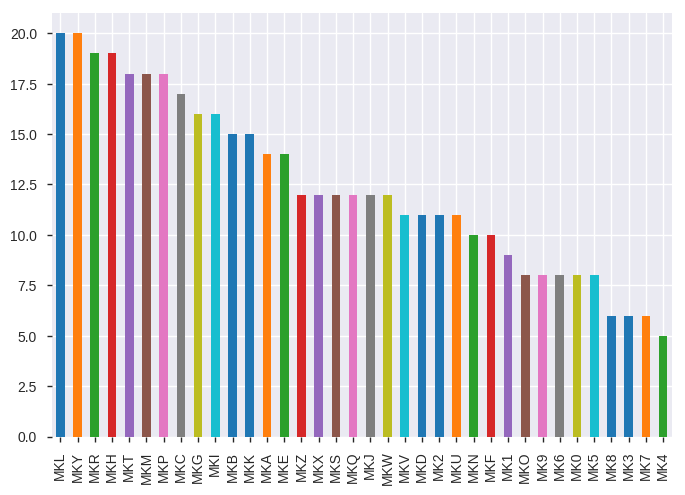

In [24]:
# filtering dataframe holding payment references with characters MK
travelsdfmk = travelsdf[travelsdf['payment_receipt'].str.contains(r'[A-Z]*MK[A-Z | 0-9]+')]

# extraction of three characters from the payment references containing MK
travelsdfmk['mk_X'] = travelsdfmk['payment_receipt'].str.extract(pat = '(MK[A-Z | 0-9])') 

# Plotting the distribution using inbuilt pandas plotting function
pd.value_counts(travelsdfmk["mk_X"]).plot.bar()



**QUESTION 4: When considering opening a new terminus in Kisii, should the terminus have mobile money capabilities? Why?**

Columns affected: travel_from, payment_method


People ideally pay for travels from the locations they are from so I first started by filtering the travel from column to only Kisii then observed the popular payment method in Kisii.

**RESULTS:** it was evident that many people travelling from Kisii opt to pay using MPESA than cash hence it will be logical when opening a new terminus in Kisii the terminus should definitely have mobile money capabi;ities due to the extensive usage of it. 

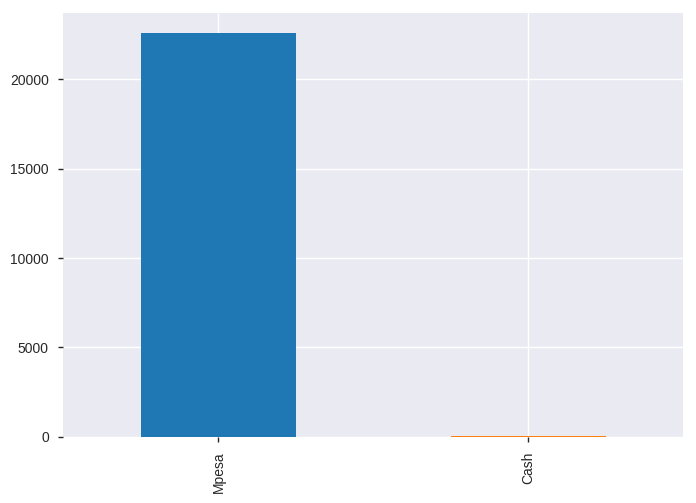

In [25]:

#filtered to get only data of travels from Kisii
travelKisii = travelsdf[travelsdf["travel_from"] == "Kisii"]

#plot a display of various payment methods in Kisii 
pd.value_counts(travelKisii["payment_method"]).plot.bar()